In [8]:
"""
损失函数是表示神经网络性能的“恶劣程度”的指标，即当前的
神经网络对监督数据在多大程度上不拟合，在多大程度上不一致。
"""
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


In [9]:
def cross_entropy_error(y,t):
    delta = 1e-9
    return -np.sum(t * np.log(delta + y))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.5108256220993241
2.3025850829940455


In [10]:
import sys, os
ds_path = os.path.join(os.curdir, 'codes')
sys.path.append(ds_path)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
 load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)


(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

def cross_entropy_error(t, y):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) /batch_size

In [13]:
"""
监督数据非One-hot表示时
"""
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_zie), t] + 1e-7)) / batch_size



In [14]:
"""
求导
"""
#数值微分
# 前向微分
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x)) / h

def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x-h)) / (2*h)


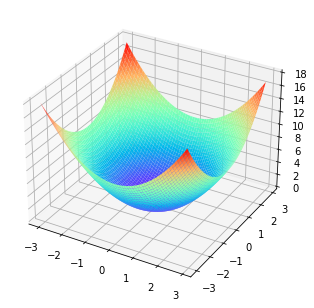

In [16]:
# 偏导

def function_2(x):
    return np.sum(x**2)

from matplotlib import pyplot as plt

x1 = np.arange(-3, 3, 0.1)
x2 = np.arange(-3, 3, 0.1)

x, y = np.meshgrid(x1, x2)
z = x**2 + y**2

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [17]:
"""
由全部变量的偏导数汇总
而成的向量称为梯度（gradient）
"""
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i in range(x.size):
        tmp_val = x[i]
        x[i] = tmp_val - h
        fxh1 = f(x)
        x[i] = tmp_val + h
        fxh2 = f(x)
        x[i] = tmp_val
        grad[i] = (fxh2 - fxh1) / (2 * h)
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No handles with labels found to put in legend.


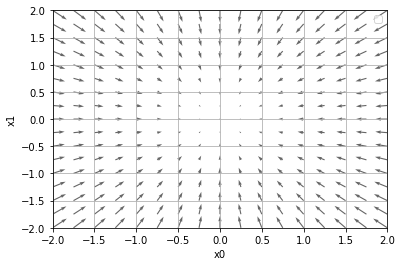

In [18]:
%run -i codes/ch04/gradient_2d.py

In [28]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

init_x = np.array([-3.0, 4.0])
print( gradient_descent(function_2, init_x, lr=0.1, step_num=100))
print( gradient_descent(function_2, init_x, lr=10, step_num=100))
print( gradient_descent(function_2, init_x, lr=1e-10, step_num=100))



[-6.11110793e-10  8.14814391e-10]
[ 2.34235971e+12 -3.96091057e+12]
[ 2.34235971e+12 -3.96091057e+12]


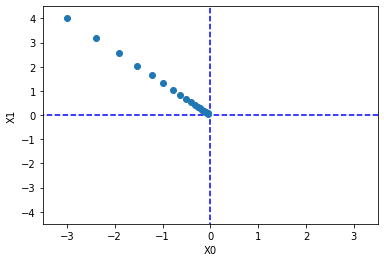

In [27]:
"""
虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地
减小函数的值。因此，在寻找函数的最小值（或者尽可能小的值）的位置的
任务中，要以梯度的信息为线索，决定前进的方向。
"""
%run -i codes/ch04/gradient_method.py


In [29]:
%run -i codes/ch04/gradient_simplenet.py

[[ 0.12181252  0.25349319 -0.37530572]
 [ 0.18271879  0.38023979 -0.56295858]]
